# HW1 : Multinomial Naive Bayes Classifier

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [4]:
print(train.data[3])

From: revdak@netcom.com (D. Andrew Kille)
Subject: Re: Serbian genocide Work of God?
Organization: NETCOM On-line Communication Services (408 241-9760 guest)
Lines: 22

James Sledd (jsledd@ssdc.sas.upenn.edu) wrote:
: Are the Serbs doing the work of God?  Hmm...

: I've been wondering if anyone would ever ask the question,

: Are the governments of the United States and Europe not moving
: to end the ethnic cleansing by the Serbs because the targets are
: muslims?

: Can/Does God use those who are not following him to accomplish
: tasks for him?  Esp those tasks that are punative?

: James Sledd
: no cute sig....  but I'm working on it.

Are you suggesting that God supports genocide?
Perhaps the Germans were "punishing" Jews on God's behalf?

Any God who works that way is indescribably evil, and unworthy of
my worship or faith.

revdak@netcom.com



In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [6]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Text(91.68, 0.5, 'predicted label')

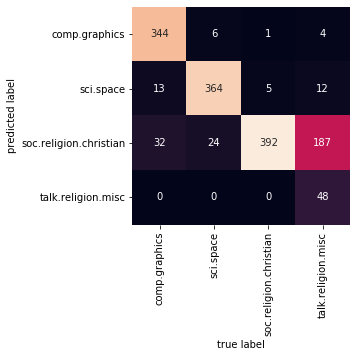

In [7]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [8]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [9]:
predict_category('sending a payload to the ISS')

'sci.space'

In [10]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [11]:
predict_category('determining the screen resolution')

'comp.graphics'